# 6.1 Data Preparation & Cleaning

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco # --> A custom library to handle country code values
import os

In [2]:
df = pd.read_csv('C:/Users/Kid/Desktop/Achievement 6/Data/imdb_movies.csv')

In [3]:
df.head()

names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   

                    orig_title     status            orig_lang     budget_x  \
0                    Creed III   Released              English   75000000.0   
1     Avatar: The Way of Water   Released              English  460000000.0   
2  The Super Mario Bros. Movie   Released              English  100000000.0   
3                       Momias   Released   Spanish, Castilian   12300000.0   
4                    Supercell   Released              English   77000000.0   

        revenue country  
0  2.716167e+08      AU  
1  2.316795e+09      AU  
2  7.244590e+08      AU  
3  3.420000e+07      AU  
4  3.409420e+08      US

## Data Exploration

In [4]:
#checking dimensions
df.shape

(10178, 12)

In [5]:
#checking column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [6]:
#checking basic statistics 
df.describe()

score      budget_x       revenue
count  10178.000000  1.017800e+04  1.017800e+04
mean      63.497052  6.488238e+07  2.531401e+08
std       13.537012  5.707565e+07  2.777880e+08
min        0.000000  1.000000e+00  0.000000e+00
25%       59.000000  1.500000e+07  2.858898e+07
50%       65.000000  5.000000e+07  1.529349e+08
75%       71.000000  1.050000e+08  4.178021e+08
max      100.000000  4.600000e+08  2.923706e+09

In [7]:
#checking for nulls
df.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [8]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
#checking for mixed-type data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

genre
crew


C:\Users\Kid\AppData\Local\Temp\ipykernel_11588\4039833460.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Kid\AppData\Local\Temp\ipykernel_11588\4039833460.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Kid\AppData\Local\Temp\ipykernel_11588\4039833460.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Kid\AppData\Local\Temp\ipykernel_11588\4039833460.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Kid\AppData\Local\Temp\ipykernel_11588\4039833460.py:3: FutureWarni

In [10]:
#checking for distributions
sns.boxplot(data=df, x='revenue')

<Axes: xlabel='revenue'>

In [11]:
sns.histplot(data=df, x='revenue')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='revenue', ylabel='Count'>

<Axes: xlabel='budget_x'>

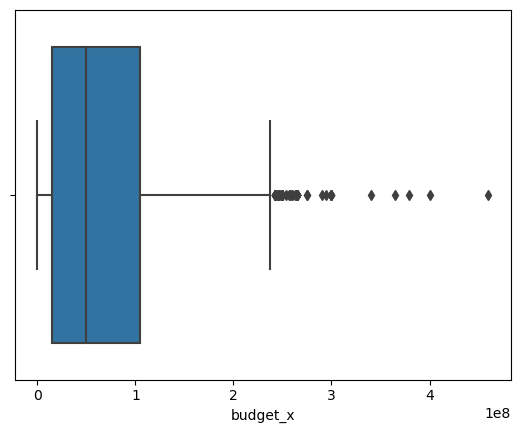

In [12]:
sns.boxplot(data=df, x='budget_x')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='budget_x', ylabel='Count'>

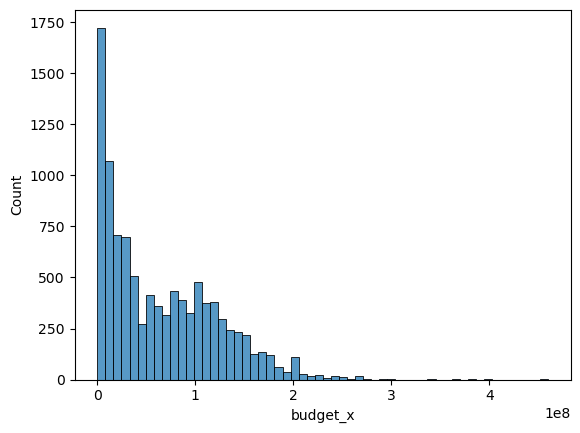

In [13]:
sns.histplot(data=df, x='budget_x')

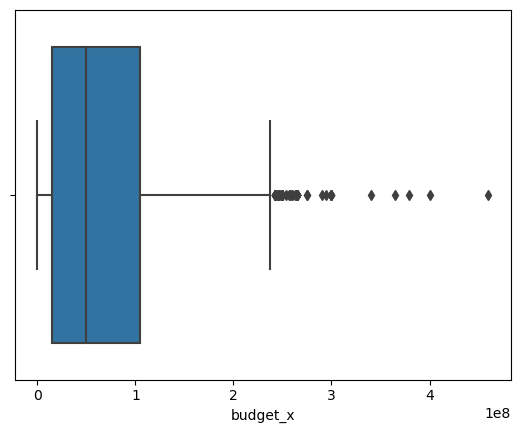

In [14]:
ax = sns.boxplot(data=df, x='budget_x')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='score', ylabel='Count'>

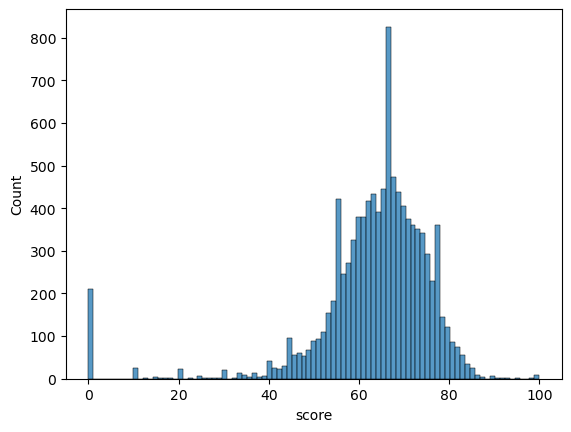

In [15]:
sns.histplot(data=df, x='score')

## Data Cleaning

In [16]:
df = df.rename(columns={'names':'title',
                        'date_x': 'release_date',
                        'orig_lang': 'languages',
                        'budget_x': 'budget'
                       })

In [17]:
df.columns

Index(['title', 'release_date', 'score', 'genre', 'overview', 'crew',
       'orig_title', 'status', 'languages', 'budget', 'revenue', 'country'],
      dtype='object')

In [18]:
#Datatype casting
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
#checking result
df['release_date'].dtype

dtype('<M8[ns]')

In [20]:
#handling mixed-type data
df['genre'] = df['genre'].astype('str')

In [21]:
df['crew'] = df['crew'].astype('str')

In [22]:
#handling nulls
df.dropna(subset=['genre', 'crew'], axis=0, inplace = True)

In [23]:
#handling invalid ('nan') values
df = df[df['genre'] != 'nan']

In [24]:
df = df[df['crew'] != 'nan']

In [25]:
df.isna().sum()

title           0
release_date    0
score           0
genre           0
overview        0
crew            0
orig_title      0
status          0
languages       0
budget          0
revenue         0
country         0
dtype: int64

In [26]:
#handling zero values
df = df[df['score'] != 0]

In [27]:
df = df[df['budget'] != 0]

In [28]:
df = df[df['revenue'] != 0]

In [29]:
#checking output
df[['score', 'budget', 'revenue']].describe()

score        budget       revenue
count  9817.000000  9.817000e+03  9.817000e+03
mean     64.883264  6.229483e+07  2.546494e+08
std       9.897942  5.422786e+07  2.786202e+08
min      10.000000  1.000000e+00  1.000000e+00
25%      60.000000  1.400000e+07  2.864956e+07
50%      66.000000  4.920000e+07  1.465959e+08
75%      72.000000  1.020000e+08  4.253123e+08
max     100.000000  4.600000e+08  2.923706e+09

In [30]:
df.shape

(9817, 12)

## Data manipulation

In [31]:
#extracting year from date
df['release_year'] = df['release_date'].dt.year

In [32]:
#checking output
df[['release_date', 'release_year']]

release_date  release_year
0       2023-03-02          2023
1       2022-12-15          2022
2       2023-04-05          2023
3       2023-01-05          2023
4       2023-03-17          2023
...            ...           ...
10173   2016-12-28          2016
10174   1990-08-24          1990
10175   1990-12-21          1990
10176   1995-07-11          1995
10177   2020-07-20          2020

[9817 rows x 2 columns]

In [33]:
#changing country codes to proper names
df['country_proper'] = coco.convert(df['country'], to='name_short')

SU not found in ISO2
SU not found in ISO2
XC not found in ISO2
SU not found in ISO2
SU not found in ISO2
SU not found in ISO2


In [34]:
df['country_proper'].value_counts(dropna=False)

country_proper
Australia             4834
United States         2632
Japan                  493
South Korea            333
France                 216
United Kingdom         168
Spain                  147
Italy                  121
Hong Kong              116
Mexico                 102
China                   85
Germany                 83
Canada                  65
Russia                  46
Argentina               39
Philippines             34
Brazil                  34
Thailand                27
India                   26
Denmark                 24
Poland                  22
Norway                  16
Türkiye                 15
Colombia                14
Netherlands             14
Taiwan                  12
Ireland                 10
Chile                    9
Indonesia                8
Sweden                   8
Peru                     7
Belgium                  6
Greece                   6
not found                6
Finland                  6
Ukraine                  4
Singapore    

In [35]:
#fixing not found country names
df.loc[df['country'] == 'SU', 'country_proper'] = 'Soviet Union' # --> some movies released in this era

In [36]:
df.loc[df['country'] == 'XC', 'country_proper'] = 'Czechia'

In [37]:
#deriving rating column
df.loc[df['score'] < 50, 'rating'] = 'Low'

In [38]:
df.loc[(df['score'] >= 50) & (df['score'] < 70), 'rating'] = 'Mid'

In [39]:
df.loc[df['score'] >= 70, 'rating'] = 'High'

In [40]:
#checking output
df['rating'].value_counts(dropna=False)

rating
Mid     5994
High    3252
Low      571
Name: count, dtype: int64

In [41]:
#extracting primary genre
df[['primary_genre', 'secondary_genre']] = df['genre'].str.split(',', n=1, expand=True)

In [42]:
df.head()

title release_date  score  \
0                    Creed III   2023-03-02   73.0   
1     Avatar: The Way of Water   2022-12-15   78.0   
2  The Super Mario Bros. Movie   2023-04-05   76.0   
3                      Mummies   2023-01-05   70.0   
4                    Supercell   2023-03-17   61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   

                    orig_title     status            languages       budget  \
0                    Creed III   Released              English   75000000.0   
1     Avatar: The Way of Water   Released              English  460000000.0   
2  The Super Mario Bros. Movie   Released              English  100000000.0   
3                       Momias   Released   Spanish, Castilian   12300000.0   
4                    Supercell   Released              English   77000000.0   

        revenue country  release_year country_proper rating    primary_genre  \
0  2.716167e+08      AU          2023      Australia   High            Drama   
1  2.316795e+09      AU          2022      Australia   High  Science Fiction   
2  7.244590e+08      AU          2023      Australia   High        Animation   
3  3.420000e+07      AU          2023      Australia   High        Animation   
4  3.409420e+08      US          2023  United States    Mid           Action   

                       secondary_genre  
0                               Action  
1                    Adventure, Action  
2   Adventure, Family, Fantasy, Comedy  
3   Comedy, Family, Adventure, Fantasy  
4                                 None

In [43]:
#checking output
df['primary_genre'].value_counts(dropna=False)

primary_genre
Drama              1810
Action             1529
Comedy             1353
Horror              913
Animation           872
Thriller            566
Adventure           563
Romance             390
Crime               365
Family              328
Science Fiction     304
Fantasy             255
Documentary         166
Mystery             107
War                  75
Music                74
Western              70
History              45
TV Movie             32
Name: count, dtype: int64

In [44]:
#dropping unnecessary columns
df.drop(columns=['country', 'secondary_genre', 'orig_title'], inplace=True)

In [45]:
df.head()

title release_date  score  \
0                    Creed III   2023-03-02   73.0   
1     Avatar: The Way of Water   2022-12-15   78.0   
2  The Super Mario Bros. Movie   2023-04-05   76.0   
3                      Mummies   2023-01-05   70.0   
4                    Supercell   2023-03-17   61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew     status  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   Released   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   Released   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   Released   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   Released   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   Released   

             languages       budget       revenue  release_year  \
0              English   75000000.0  2.716167e+08          2023   
1              English  460000000.0  2.316795e+09          2022   
2              English  100000000.0  7.244590e+08          2023   
3   Spanish, Castilian   12300000.0  3.420000e+07          2023   
4              English   77000000.0  3.409420e+08          2023   

  country_proper rating    primary_genre  
0      Australia   High            Drama  
1      Australia   High  Science Fiction  
2      Australia   High        Animation  
3      Australia   High        Animation  
4  United States    Mid           Action

In [46]:
df.shape

(9817, 14)

In [ ]:
#exporting dataset
df.to_csv('C:/Users/Kid/Desktop/Achievement 6/Data/imdb_movies_cleaned.csv')